In [1]:
import copy
import h5py
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms, models
import torch.nn as nn
import torch.optim as optim
import torch

print(torch.__version__)
print(torch.cuda.is_available())
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(10)


1.10.1
True


In [25]:
# Calculate the value of mean and varience of this dataset

In [8]:
import cv2
 
img_h, img_w = 512, 512   
means, stdevs = [], []
img_list = []
 
imgs_path = r'./test/'
imgs_path_list = os.listdir(imgs_path)
 
len_ = len(imgs_path_list)
i = 0

for item in imgs_path_list:
    img = cv2.imread(os.path.join(imgs_path,item))
    img = cv2.resize(img,(img_w,img_h))
    img = img[:, :, :, np.newaxis]
    img_list.append(img)
    i += 1
    print(i,'/',len_)    

imgs = np.concatenate(img_list, axis=3)
imgs = imgs.astype(np.float32) / 255.
 
for i in range(3):
    pixels = imgs[:, :, i, :].ravel()  
    means.append(np.mean(pixels))
    stdevs.append(np.std(pixels))

means.reverse()
stdevs.reverse()

print("normMean = {}".format(means))
print("normStd = {}".format(stdevs))


1 / 7404
2 / 7404
3 / 7404
4 / 7404
5 / 7404
6 / 7404
7 / 7404
8 / 7404
9 / 7404
10 / 7404
11 / 7404
12 / 7404
13 / 7404
14 / 7404
15 / 7404
16 / 7404
17 / 7404
18 / 7404
19 / 7404
20 / 7404
21 / 7404
22 / 7404
23 / 7404
24 / 7404
25 / 7404
26 / 7404
27 / 7404
28 / 7404
29 / 7404
30 / 7404
31 / 7404
32 / 7404
33 / 7404
34 / 7404
35 / 7404
36 / 7404
37 / 7404
38 / 7404
39 / 7404
40 / 7404
41 / 7404
42 / 7404
43 / 7404
44 / 7404
45 / 7404
46 / 7404
47 / 7404
48 / 7404
49 / 7404
50 / 7404
51 / 7404
52 / 7404
53 / 7404
54 / 7404
55 / 7404
56 / 7404
57 / 7404
58 / 7404
59 / 7404
60 / 7404
61 / 7404
62 / 7404
63 / 7404
64 / 7404
65 / 7404
66 / 7404
67 / 7404
68 / 7404
69 / 7404
70 / 7404
71 / 7404
72 / 7404
73 / 7404
74 / 7404
75 / 7404
76 / 7404
77 / 7404
78 / 7404
79 / 7404
80 / 7404
81 / 7404
82 / 7404
83 / 7404
84 / 7404
85 / 7404
86 / 7404
87 / 7404
88 / 7404
89 / 7404
90 / 7404
91 / 7404
92 / 7404
93 / 7404
94 / 7404
95 / 7404
96 / 7404
97 / 7404
98 / 7404
99 / 7404
100 / 7404
101 / 74

787 / 7404
788 / 7404
789 / 7404
790 / 7404
791 / 7404
792 / 7404
793 / 7404
794 / 7404
795 / 7404
796 / 7404
797 / 7404
798 / 7404
799 / 7404
800 / 7404
801 / 7404
802 / 7404
803 / 7404
804 / 7404
805 / 7404
806 / 7404
807 / 7404
808 / 7404
809 / 7404
810 / 7404
811 / 7404
812 / 7404
813 / 7404
814 / 7404
815 / 7404
816 / 7404
817 / 7404
818 / 7404
819 / 7404
820 / 7404
821 / 7404
822 / 7404
823 / 7404
824 / 7404
825 / 7404
826 / 7404
827 / 7404
828 / 7404
829 / 7404
830 / 7404
831 / 7404
832 / 7404
833 / 7404
834 / 7404
835 / 7404
836 / 7404
837 / 7404
838 / 7404
839 / 7404
840 / 7404
841 / 7404
842 / 7404
843 / 7404
844 / 7404
845 / 7404
846 / 7404
847 / 7404
848 / 7404
849 / 7404
850 / 7404
851 / 7404
852 / 7404
853 / 7404
854 / 7404
855 / 7404
856 / 7404
857 / 7404
858 / 7404
859 / 7404
860 / 7404
861 / 7404
862 / 7404
863 / 7404
864 / 7404
865 / 7404
866 / 7404
867 / 7404
868 / 7404
869 / 7404
870 / 7404
871 / 7404
872 / 7404
873 / 7404
874 / 7404
875 / 7404
876 / 7404
877 / 7404

1536 / 7404
1537 / 7404
1538 / 7404
1539 / 7404
1540 / 7404
1541 / 7404
1542 / 7404
1543 / 7404
1544 / 7404
1545 / 7404
1546 / 7404
1547 / 7404
1548 / 7404
1549 / 7404
1550 / 7404
1551 / 7404
1552 / 7404
1553 / 7404
1554 / 7404
1555 / 7404
1556 / 7404
1557 / 7404
1558 / 7404
1559 / 7404
1560 / 7404
1561 / 7404
1562 / 7404
1563 / 7404
1564 / 7404
1565 / 7404
1566 / 7404
1567 / 7404
1568 / 7404
1569 / 7404
1570 / 7404
1571 / 7404
1572 / 7404
1573 / 7404
1574 / 7404
1575 / 7404
1576 / 7404
1577 / 7404
1578 / 7404
1579 / 7404
1580 / 7404
1581 / 7404
1582 / 7404
1583 / 7404
1584 / 7404
1585 / 7404
1586 / 7404
1587 / 7404
1588 / 7404
1589 / 7404
1590 / 7404
1591 / 7404
1592 / 7404
1593 / 7404
1594 / 7404
1595 / 7404
1596 / 7404
1597 / 7404
1598 / 7404
1599 / 7404
1600 / 7404
1601 / 7404
1602 / 7404
1603 / 7404
1604 / 7404
1605 / 7404
1606 / 7404
1607 / 7404
1608 / 7404
1609 / 7404
1610 / 7404
1611 / 7404
1612 / 7404
1613 / 7404
1614 / 7404
1615 / 7404
1616 / 7404
1617 / 7404
1618 / 7404
1619

2270 / 7404
2271 / 7404
2272 / 7404
2273 / 7404
2274 / 7404
2275 / 7404
2276 / 7404
2277 / 7404
2278 / 7404
2279 / 7404
2280 / 7404
2281 / 7404
2282 / 7404
2283 / 7404
2284 / 7404
2285 / 7404
2286 / 7404
2287 / 7404
2288 / 7404
2289 / 7404
2290 / 7404
2291 / 7404
2292 / 7404
2293 / 7404
2294 / 7404
2295 / 7404
2296 / 7404
2297 / 7404
2298 / 7404
2299 / 7404
2300 / 7404
2301 / 7404
2302 / 7404
2303 / 7404
2304 / 7404
2305 / 7404
2306 / 7404
2307 / 7404
2308 / 7404
2309 / 7404
2310 / 7404
2311 / 7404
2312 / 7404
2313 / 7404
2314 / 7404
2315 / 7404
2316 / 7404
2317 / 7404
2318 / 7404
2319 / 7404
2320 / 7404
2321 / 7404
2322 / 7404
2323 / 7404
2324 / 7404
2325 / 7404
2326 / 7404
2327 / 7404
2328 / 7404
2329 / 7404
2330 / 7404
2331 / 7404
2332 / 7404
2333 / 7404
2334 / 7404
2335 / 7404
2336 / 7404
2337 / 7404
2338 / 7404
2339 / 7404
2340 / 7404
2341 / 7404
2342 / 7404
2343 / 7404
2344 / 7404
2345 / 7404
2346 / 7404
2347 / 7404
2348 / 7404
2349 / 7404
2350 / 7404
2351 / 7404
2352 / 7404
2353

2970 / 7404
2971 / 7404
2972 / 7404
2973 / 7404
2974 / 7404
2975 / 7404
2976 / 7404
2977 / 7404
2978 / 7404
2979 / 7404
2980 / 7404
2981 / 7404
2982 / 7404
2983 / 7404
2984 / 7404
2985 / 7404
2986 / 7404
2987 / 7404
2988 / 7404
2989 / 7404
2990 / 7404
2991 / 7404
2992 / 7404
2993 / 7404
2994 / 7404
2995 / 7404
2996 / 7404
2997 / 7404
2998 / 7404
2999 / 7404
3000 / 7404
3001 / 7404
3002 / 7404
3003 / 7404
3004 / 7404
3005 / 7404
3006 / 7404
3007 / 7404
3008 / 7404
3009 / 7404
3010 / 7404
3011 / 7404
3012 / 7404
3013 / 7404
3014 / 7404
3015 / 7404
3016 / 7404
3017 / 7404
3018 / 7404
3019 / 7404
3020 / 7404
3021 / 7404
3022 / 7404
3023 / 7404
3024 / 7404
3025 / 7404
3026 / 7404
3027 / 7404
3028 / 7404
3029 / 7404
3030 / 7404
3031 / 7404
3032 / 7404
3033 / 7404
3034 / 7404
3035 / 7404
3036 / 7404
3037 / 7404
3038 / 7404
3039 / 7404
3040 / 7404
3041 / 7404
3042 / 7404
3043 / 7404
3044 / 7404
3045 / 7404
3046 / 7404
3047 / 7404
3048 / 7404
3049 / 7404
3050 / 7404
3051 / 7404
3052 / 7404
3053

3671 / 7404
3672 / 7404
3673 / 7404
3674 / 7404
3675 / 7404
3676 / 7404
3677 / 7404
3678 / 7404
3679 / 7404
3680 / 7404
3681 / 7404
3682 / 7404
3683 / 7404
3684 / 7404
3685 / 7404
3686 / 7404
3687 / 7404
3688 / 7404
3689 / 7404
3690 / 7404
3691 / 7404
3692 / 7404
3693 / 7404
3694 / 7404
3695 / 7404
3696 / 7404
3697 / 7404
3698 / 7404
3699 / 7404
3700 / 7404
3701 / 7404
3702 / 7404
3703 / 7404
3704 / 7404
3705 / 7404
3706 / 7404
3707 / 7404
3708 / 7404
3709 / 7404
3710 / 7404
3711 / 7404
3712 / 7404
3713 / 7404
3714 / 7404
3715 / 7404
3716 / 7404
3717 / 7404
3718 / 7404
3719 / 7404
3720 / 7404
3721 / 7404
3722 / 7404
3723 / 7404
3724 / 7404
3725 / 7404
3726 / 7404
3727 / 7404
3728 / 7404
3729 / 7404
3730 / 7404
3731 / 7404
3732 / 7404
3733 / 7404
3734 / 7404
3735 / 7404
3736 / 7404
3737 / 7404
3738 / 7404
3739 / 7404
3740 / 7404
3741 / 7404
3742 / 7404
3743 / 7404
3744 / 7404
3745 / 7404
3746 / 7404
3747 / 7404
3748 / 7404
3749 / 7404
3750 / 7404
3751 / 7404
3752 / 7404
3753 / 7404
3754

4390 / 7404
4391 / 7404
4392 / 7404
4393 / 7404
4394 / 7404
4395 / 7404
4396 / 7404
4397 / 7404
4398 / 7404
4399 / 7404
4400 / 7404
4401 / 7404
4402 / 7404
4403 / 7404
4404 / 7404
4405 / 7404
4406 / 7404
4407 / 7404
4408 / 7404
4409 / 7404
4410 / 7404
4411 / 7404
4412 / 7404
4413 / 7404
4414 / 7404
4415 / 7404
4416 / 7404
4417 / 7404
4418 / 7404
4419 / 7404
4420 / 7404
4421 / 7404
4422 / 7404
4423 / 7404
4424 / 7404
4425 / 7404
4426 / 7404
4427 / 7404
4428 / 7404
4429 / 7404
4430 / 7404
4431 / 7404
4432 / 7404
4433 / 7404
4434 / 7404
4435 / 7404
4436 / 7404
4437 / 7404
4438 / 7404
4439 / 7404
4440 / 7404
4441 / 7404
4442 / 7404
4443 / 7404
4444 / 7404
4445 / 7404
4446 / 7404
4447 / 7404
4448 / 7404
4449 / 7404
4450 / 7404
4451 / 7404
4452 / 7404
4453 / 7404
4454 / 7404
4455 / 7404
4456 / 7404
4457 / 7404
4458 / 7404
4459 / 7404
4460 / 7404
4461 / 7404
4462 / 7404
4463 / 7404
4464 / 7404
4465 / 7404
4466 / 7404
4467 / 7404
4468 / 7404
4469 / 7404
4470 / 7404
4471 / 7404
4472 / 7404
4473

5121 / 7404
5122 / 7404
5123 / 7404
5124 / 7404
5125 / 7404
5126 / 7404
5127 / 7404
5128 / 7404
5129 / 7404
5130 / 7404
5131 / 7404
5132 / 7404
5133 / 7404
5134 / 7404
5135 / 7404
5136 / 7404
5137 / 7404
5138 / 7404
5139 / 7404
5140 / 7404
5141 / 7404
5142 / 7404
5143 / 7404
5144 / 7404
5145 / 7404
5146 / 7404
5147 / 7404
5148 / 7404
5149 / 7404
5150 / 7404
5151 / 7404
5152 / 7404
5153 / 7404
5154 / 7404
5155 / 7404
5156 / 7404
5157 / 7404
5158 / 7404
5159 / 7404
5160 / 7404
5161 / 7404
5162 / 7404
5163 / 7404
5164 / 7404
5165 / 7404
5166 / 7404
5167 / 7404
5168 / 7404
5169 / 7404
5170 / 7404
5171 / 7404
5172 / 7404
5173 / 7404
5174 / 7404
5175 / 7404
5176 / 7404
5177 / 7404
5178 / 7404
5179 / 7404
5180 / 7404
5181 / 7404
5182 / 7404
5183 / 7404
5184 / 7404
5185 / 7404
5186 / 7404
5187 / 7404
5188 / 7404
5189 / 7404
5190 / 7404
5191 / 7404
5192 / 7404
5193 / 7404
5194 / 7404
5195 / 7404
5196 / 7404
5197 / 7404
5198 / 7404
5199 / 7404
5200 / 7404
5201 / 7404
5202 / 7404
5203 / 7404
5204

5848 / 7404
5849 / 7404
5850 / 7404
5851 / 7404
5852 / 7404
5853 / 7404
5854 / 7404
5855 / 7404
5856 / 7404
5857 / 7404
5858 / 7404
5859 / 7404
5860 / 7404
5861 / 7404
5862 / 7404
5863 / 7404
5864 / 7404
5865 / 7404
5866 / 7404
5867 / 7404
5868 / 7404
5869 / 7404
5870 / 7404
5871 / 7404
5872 / 7404
5873 / 7404
5874 / 7404
5875 / 7404
5876 / 7404
5877 / 7404
5878 / 7404
5879 / 7404
5880 / 7404
5881 / 7404
5882 / 7404
5883 / 7404
5884 / 7404
5885 / 7404
5886 / 7404
5887 / 7404
5888 / 7404
5889 / 7404
5890 / 7404
5891 / 7404
5892 / 7404
5893 / 7404
5894 / 7404
5895 / 7404
5896 / 7404
5897 / 7404
5898 / 7404
5899 / 7404
5900 / 7404
5901 / 7404
5902 / 7404
5903 / 7404
5904 / 7404
5905 / 7404
5906 / 7404
5907 / 7404
5908 / 7404
5909 / 7404
5910 / 7404
5911 / 7404
5912 / 7404
5913 / 7404
5914 / 7404
5915 / 7404
5916 / 7404
5917 / 7404
5918 / 7404
5919 / 7404
5920 / 7404
5921 / 7404
5922 / 7404
5923 / 7404
5924 / 7404
5925 / 7404
5926 / 7404
5927 / 7404
5928 / 7404
5929 / 7404
5930 / 7404
5931

6535 / 7404
6536 / 7404
6537 / 7404
6538 / 7404
6539 / 7404
6540 / 7404
6541 / 7404
6542 / 7404
6543 / 7404
6544 / 7404
6545 / 7404
6546 / 7404
6547 / 7404
6548 / 7404
6549 / 7404
6550 / 7404
6551 / 7404
6552 / 7404
6553 / 7404
6554 / 7404
6555 / 7404
6556 / 7404
6557 / 7404
6558 / 7404
6559 / 7404
6560 / 7404
6561 / 7404
6562 / 7404
6563 / 7404
6564 / 7404
6565 / 7404
6566 / 7404
6567 / 7404
6568 / 7404
6569 / 7404
6570 / 7404
6571 / 7404
6572 / 7404
6573 / 7404
6574 / 7404
6575 / 7404
6576 / 7404
6577 / 7404
6578 / 7404
6579 / 7404
6580 / 7404
6581 / 7404
6582 / 7404
6583 / 7404
6584 / 7404
6585 / 7404
6586 / 7404
6587 / 7404
6588 / 7404
6589 / 7404
6590 / 7404
6591 / 7404
6592 / 7404
6593 / 7404
6594 / 7404
6595 / 7404
6596 / 7404
6597 / 7404
6598 / 7404
6599 / 7404
6600 / 7404
6601 / 7404
6602 / 7404
6603 / 7404
6604 / 7404
6605 / 7404
6606 / 7404
6607 / 7404
6608 / 7404
6609 / 7404
6610 / 7404
6611 / 7404
6612 / 7404
6613 / 7404
6614 / 7404
6615 / 7404
6616 / 7404
6617 / 7404
6618

7227 / 7404
7228 / 7404
7229 / 7404
7230 / 7404
7231 / 7404
7232 / 7404
7233 / 7404
7234 / 7404
7235 / 7404
7236 / 7404
7237 / 7404
7238 / 7404
7239 / 7404
7240 / 7404
7241 / 7404
7242 / 7404
7243 / 7404
7244 / 7404
7245 / 7404
7246 / 7404
7247 / 7404
7248 / 7404
7249 / 7404
7250 / 7404
7251 / 7404
7252 / 7404
7253 / 7404
7254 / 7404
7255 / 7404
7256 / 7404
7257 / 7404
7258 / 7404
7259 / 7404
7260 / 7404
7261 / 7404
7262 / 7404
7263 / 7404
7264 / 7404
7265 / 7404
7266 / 7404
7267 / 7404
7268 / 7404
7269 / 7404
7270 / 7404
7271 / 7404
7272 / 7404
7273 / 7404
7274 / 7404
7275 / 7404
7276 / 7404
7277 / 7404
7278 / 7404
7279 / 7404
7280 / 7404
7281 / 7404
7282 / 7404
7283 / 7404
7284 / 7404
7285 / 7404
7286 / 7404
7287 / 7404
7288 / 7404
7289 / 7404
7290 / 7404
7291 / 7404
7292 / 7404
7293 / 7404
7294 / 7404
7295 / 7404
7296 / 7404
7297 / 7404
7298 / 7404
7299 / 7404
7300 / 7404
7301 / 7404
7302 / 7404
7303 / 7404
7304 / 7404
7305 / 7404
7306 / 7404
7307 / 7404
7308 / 7404
7309 / 7404
7310

In [2]:
# Dataloader

In [2]:
def getData(mode):
    if mode == 'train':
        img = pd.read_csv('train_img.csv')
        label = pd.read_csv('train_label.csv')
        return np.squeeze(img.values), np.squeeze(label.values)
    else:
        img = pd.read_csv('test_img.csv')
        label = pd.read_csv('test_label.csv')
        return np.squeeze(img.values), np.squeeze(label.values)


class RetinopathyLoader(Dataset):
    def __init__(self, root, mode):
        """
        Args:
            root (string): Root path of the dataset.
            mode : Indicate procedure status(training or testing)

            self.img_name (string list): String list that store all image names.
            self.label (int or float list): Numerical list that store all ground truth label values.
        """
        self.root = root
        self.img_name, self.label = getData(mode)
        self.mode = mode
        
        #self.file = h5py.File('data.h5', 'r')
        #self.preloadimg = self.file['train_img'][[i for i in range(35126)],:,:]
        
        self.transformations = transforms.Compose([transforms.RandomHorizontalFlip(),transforms.RandomVerticalFlip(),
                                                 #transforms.RandomResizedCrop((512, 512)),
                                                 transforms.RandomRotation(degrees=30),
                                                 transforms.ToTensor(), 
                                                 transforms.Normalize((0.3775, 0.2618, 0.1873),(0.2918, 0.2088, 0.1684))
                                               ])     
        
        print("> Found %d images..." % (len(self.img_name)))

    def __len__(self):
        """'return the size of dataset"""
        return len(self.img_name)
        
    def __getitem__(self, index):
        """something you should implement here"""

        """
           step1. Get the image path from 'self.img_name' and load it.
                  hint : path = root + self.img_name[index] + '.jpeg'
           
           step2. Get the ground truth label from self.label
                     
           step3. Transform the .jpeg rgb images during the training phase, such as resizing, random flipping, 
                  rotation, cropping, normalization etc. But at the beginning, I suggest you follow the hints. 
                       
                  In the testing phase, if you have a normalization process during the training phase, you only need 
                  to normalize the data. 
                  
                  hints : Convert the pixel value to [0, 1]
                          Transpose the image shape from [H, W, C] to [C, H, W]
                         
            step4. Return processed image and label
        """
        single_img_name = os.path.join(self.root, self.img_name[index]+'.jpeg')
        single_img = Image.open(single_img_name)  # read an PIL image
        #single_img = Image.fromarray(self.preloadimg[index])
        img = self.transformations(single_img)
        label = self.label[index]

        return img, label
    

In [3]:
# ResNet18

In [3]:
class ResNet18(nn.Module):
    def __init__(self, num_class, pretrained=False):
        """
        Args:
            num_class: #target class
            pretrained: 
                True: the model will have pretrained weights, and only the last layer's 'requires_grad' is True(trainable)
                False: random initialize weights, and all layer's 'require_grad' is True
        """
        #super(ResNet18, self).__init__()
        super().__init__()
        self.model = models.resnet18(pretrained=pretrained)   
        
        if pretrained:
            for param in self.model.parameters():
                param.requires_grad = False   # freezing the part of the model as no changes happen to its parameters.
                                            
        num_ftrs = self.model.fc.in_features   
        self.model.fc = nn.Linear(num_ftrs, num_class)   # Replace the last fully-connected layer
        
    def forward(self,X):
        out = self.model(X)
        return out
    

In [6]:
resnet18 = models.resnet18(pretrained=False)
print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [5]:
# ResNet50

In [4]:
class ResNet50(nn.Module):
    def __init__(self, num_class, pretrained=False):
        """
        Args:
            num_class: #target class
            pretrained: 
                True: the model will have pretrained weights, and only the last layer's 'requires_grad' is True(trainable)
                False: random initialize weights, and all layer's 'require_grad' is True
        """
        #super(ResNet50,self).__init__()
        super().__init__()
        self.model = models.resnet50(pretrained=pretrained)
        
        if pretrained:
            for param in self.model.parameters():
                param.requires_grad = False 
                
        num_ftrs = self.model.fc.in_features
        self.model.fc = nn.Linear(num_ftrs, num_class)
        
    def forward(self,X):
        out = self.model(X)
        return out
    

In [7]:
resnet50 = models.resnet50(pretrained=False)
print(resnet50)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [5]:
def train(model, loader_train, loader_test, Loss,optimizer, epochs, device, num_class,name):
    """
    Args:
        model: resnet model
        loader_train: training dataloader
        loader_test: testing dataloader
        Loss: loss function
        optimizer: optimizer
        epochs: number of training epoch
        device: gpu/cpu
        num_class: #target class
        name: model name when saving model
    Returns:
        dataframe: with column 'epoch','acc_train','acc_test'
    """
    
    model.to(device)
    df = pd.DataFrame()
    df['epoch'] = range(1, epochs+1)
    best_model_wts = None
    best_evaluated_acc = 0
    acc_train = list()
    acc_test = list()
    
    for epoch in range(1, epochs+1):
        """train"""
        with torch.set_grad_enabled(True):
            model.train()
            total_loss = 0
            correct = 0
            for images, targets in loader_train:
                images, targets = images.to(device), targets.to(device,dtype=torch.long)
                predict = model(images)
                loss = Loss(predict, targets)
                total_loss += loss.item()
                correct += predict.max(dim=1)[1].eq(targets).sum().item()              
                """update"""
                optimizer.zero_grad() #重設參數梯度(gradient)
                loss.backward() 
                optimizer.step() #更新參數
                
            total_loss /= len(loader_train.dataset)
            acc = 100. * correct / len(loader_train.dataset)
            acc_train.append(acc)
            print(f'epoch{epoch:>2d} loss:{total_loss:.4f} acc:{acc:.2f}%')
            
        """evaluate"""
        _, acc = evaluate(model, loader_test, device, num_class)
        acc_test.append(acc)
        # update best_model_wts
        if acc > best_evaluated_acc:
            best_evaluated_acc = acc
            best_model_wts = copy.deepcopy(model.state_dict())
    
    df['acc_train'] = acc_train
    df['acc_test'] = acc_test
    
    # save model
    torch.save(best_model_wts, os.path.join('models', name+'.pt'))
    model.load_state_dict(best_model_wts)
    
    return df


In [6]:
def evaluate(model, loader_test, device, num_class):
    """
    Args:
        model: resnet model
        loader_test: testing dataloader
        device: gpu/cpu
        num_class: #target class
    Returns:
        confusion_matrix: (num_class,num_class) ndarray
        acc: accuracy rate
    """
    
    confusion_matrix = np.zeros((num_class, num_class))
    
    with torch.set_grad_enabled(False):
        model.eval()
        correct = 0
        for images, targets in loader_test:  
            images, targets = images.to(device), targets.to(device,dtype=torch.long)
            predict = model(images)
            predict_class = predict.max(dim=1)[1]
            correct += predict_class.eq(targets).sum().item()
            
            for i in range(len(targets)):
                confusion_matrix[int(targets[i])][int(predict_class[i])] += 1
                
        acc = 100. * correct / len(loader_test.dataset)
        
    # normalize confusion_matrix
    confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1).reshape(num_class, 1)
    
    return confusion_matrix, acc


In [7]:
def plot(dataframe1, dataframe2, title):
    """
    Arguments:
        dataframe1: dataframe with 'epoch','acc_train','acc_test' columns of without pretrained weights model 
        dataframe2: dataframe with 'epoch','acc_train','acc_test' columns of with pretrained weights model 
        title: figure's title
    Returns:
        figure: an figure
    """
    
    fig = plt.figure(figsize=(10,6))
    
    for name in dataframe1.columns[1:]:
        plt.plot(range(1,1+len(dataframe1)), name,data=dataframe1, label=name[4:]+'(no pretraining)')
        
    for name in dataframe2.columns[1:]:
        plt.plot(range(1,1+len(dataframe2)), name,data=dataframe2, label=name[4:]+'(with pretraining)')
        
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy(%)')
    plt.title(title)
    plt.legend()
    
    return fig

def plot_confusion_matrix(confusion_matrix):
    fig, ax = plt.subplots(figsize=(6,6))
    ax.matshow(confusion_matrix, cmap=plt.cm.Blues)
    ax.xaxis.set_label_position('top')
    
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            ax.text(i, j, '{:.2f}'.format(confusion_matrix[j, i]), va='center', ha='center')
            
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    
    return fig


In [8]:
# ResNet18

In [13]:
batch_size = 64   
lr = 1e-3 
momentum = 0.9   
weight_decay = 5e-4   
Loss = nn.CrossEntropyLoss()
epochs = 20   # 10(resnet18), 5(resnet50)
epochs_feature_extraction = 5
epochs_fine_tuning = 15
num_class = 5

In [14]:
dataset_train = RetinopathyLoader(root='data', mode='train')
loader_train = DataLoader(dataset=dataset_train, batch_size=batch_size, shuffle=True, pin_memory=True)

dataset_test = RetinopathyLoader(root='data', mode='test')
loader_test = DataLoader(dataset=dataset_test, batch_size=batch_size, shuffle=False, pin_memory=True)

> Found 28099 images...
> Found 7025 images...


epoch 1 loss:0.0137 acc:73.19%
epoch 2 loss:0.0135 acc:73.48%
epoch 3 loss:0.0135 acc:73.49%
epoch 4 loss:0.0135 acc:73.50%
epoch 5 loss:0.0134 acc:73.48%
epoch 6 loss:0.0134 acc:73.50%
epoch 7 loss:0.0133 acc:73.47%
epoch 8 loss:0.0134 acc:73.48%
epoch 9 loss:0.0133 acc:73.50%
epoch10 loss:0.0133 acc:73.49%
epoch11 loss:0.0133 acc:73.47%
epoch12 loss:0.0133 acc:73.47%
epoch13 loss:0.0132 acc:73.49%
epoch14 loss:0.0132 acc:73.48%
epoch15 loss:0.0132 acc:73.46%
epoch16 loss:0.0132 acc:73.48%
epoch17 loss:0.0132 acc:73.48%
epoch18 loss:0.0131 acc:73.47%
epoch19 loss:0.0132 acc:73.49%
epoch20 loss:0.0131 acc:73.47%
epoch 1 loss:0.0133 acc:73.06%
epoch 2 loss:0.0126 acc:73.65%
epoch 3 loss:0.0124 acc:73.74%
epoch 4 loss:0.0122 acc:73.79%
epoch 5 loss:0.0121 acc:73.96%
epoch 1 loss:0.0112 acc:75.91%
epoch 2 loss:0.0100 acc:78.58%
epoch 3 loss:0.0095 acc:79.65%
epoch 4 loss:0.0093 acc:80.17%
epoch 5 loss:0.0090 acc:80.81%
epoch 6 loss:0.0088 acc:81.05%
epoch 7 loss:0.0087 acc:81.39%
epoch 8 

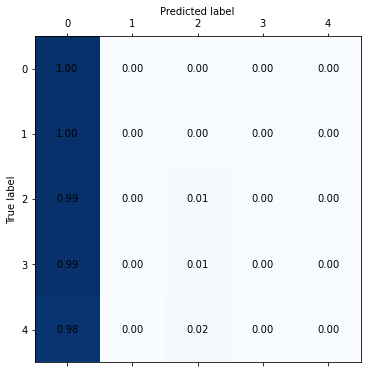

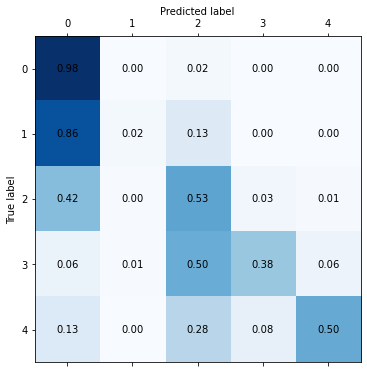

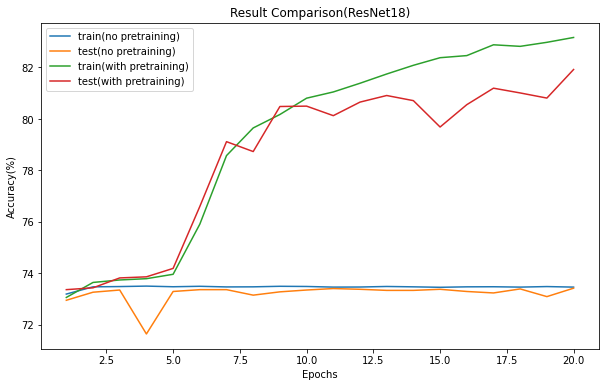

In [15]:
"""no pretrained weights"""
model_no_pretrained = ResNet18(num_class=num_class, pretrained=False)
optimizer = optim.SGD(model_no_pretrained.parameters(), lr=lr, momentum=momentum, weight_decay=weight_decay)
#optimizer = optim.RMSprop(model_no_pretrained.parameters(), lr=lr, weight_decay=weight_decay)
df_no_pretrained = train(model_no_pretrained, loader_train, loader_test, Loss, optimizer, epochs, device,
                         num_class, 'resnet18_no_pretraining')

# test and save confusion matrix figure
confusion_matrix, _ = evaluate(model_no_pretrained, loader_test, device, num_class)
figure = plot_confusion_matrix(confusion_matrix)
figure.savefig('ResNet18(no pretrained weights).png')


"""with pretrained weights (feature extraction for few epochs, then finefuning for some epochs)"""
model_with_pretrained = ResNet18(num_class=num_class, pretrained=True)

# feature extraction
params_to_update=[]
for name, param in model_with_pretrained.named_parameters():
    if param.requires_grad:
        params_to_update.append(param)
optimizer = optim.SGD(params_to_update, lr=lr, momentum=momentum, weight_decay=weight_decay)
df_firststep = train(model_with_pretrained, loader_train, loader_test, Loss, optimizer, epochs_feature_extraction,
                     device, num_class, 'resnet18_with_pretraining')
# finetuning
for param in model_with_pretrained.parameters():
    param.requires_grad = True
optimizer = optim.SGD(model_with_pretrained.parameters(), lr=lr, momentum=momentum, weight_decay=weight_decay)
df_secondstep = train(model_with_pretrained, loader_train, loader_test, Loss, optimizer, epochs_fine_tuning,
                      device, num_class, 'resnet18_with_pretraining')
df_with_pretrained = pd.concat([df_firststep, df_secondstep], axis=0, ignore_index=True)

# test and save confusion matrix figure
confusion_matrix, _ = evaluate(model_with_pretrained, loader_test, device, num_class)
figure = plot_confusion_matrix(confusion_matrix)
figure.savefig('ResNet18(with pretrained weights).png')

# plot accuracy figure
figure = plot(df_no_pretrained, df_with_pretrained, 'Result Comparison(ResNet18)')
figure.savefig('Result Comparison(ResNet18).png')


In [17]:
print('resnet18_no_pretraining')
print(df_no_pretrained)

print('resnet18_with_pretraining')
print(df_with_pretrained)

resnet18_no_pretraining
    epoch  acc_train   acc_test
0       1  73.194776  72.953737
1       2  73.475924  73.266904
2       3  73.486601  73.352313
3       4  73.504395  71.644128
4       5  73.479483  73.295374
5       6  73.497277  73.366548
6       7  73.472366  73.366548
7       8  73.475924  73.153025
8       9  73.497277  73.281139
9      10  73.490160  73.352313
10     11  73.465248  73.409253
11     12  73.468807  73.380783
12     13  73.490160  73.338078
13     14  73.475924  73.338078
14     15  73.458130  73.380783
15     16  73.475924  73.295374
16     17  73.479483  73.238434
17     18  73.465248  73.395018
18     19  73.486601  73.096085
19     20  73.465248  73.423488
resnet18_with_pretraining
    epoch  acc_train   acc_test
0       1  73.063098  73.366548
1       2  73.646749  73.437722
2       3  73.742838  73.822064
3       4  73.792662  73.864769
4       5  73.963486  74.192171
5       1  75.910175  76.597865
6       2  78.575750  79.117438
7       3  79.650521  

In [ ]:
# ResNet50

In [18]:
batch_size=16

In [19]:
dataset_train = RetinopathyLoader(root='data',mode='train')
loader_train = DataLoader(dataset=dataset_train,batch_size=batch_size,shuffle=True)

dataset_test = RetinopathyLoader(root='data',mode='test')
loader_test = DataLoader(dataset=dataset_test,batch_size=batch_size,shuffle=False)

> Found 28099 images...
> Found 7025 images...


epoch 1 loss:0.0583 acc:72.81%
epoch 2 loss:0.0559 acc:73.18%
epoch 3 loss:0.0550 acc:73.32%
epoch 4 loss:0.0548 acc:73.32%
epoch 5 loss:0.0544 acc:73.42%
epoch 6 loss:0.0542 acc:73.49%
epoch 7 loss:0.0542 acc:73.44%
epoch 8 loss:0.0541 acc:73.48%
epoch 9 loss:0.0539 acc:73.47%
epoch10 loss:0.0540 acc:73.45%
epoch11 loss:0.0537 acc:73.49%
epoch12 loss:0.0539 acc:73.45%
epoch13 loss:0.0539 acc:73.44%
epoch14 loss:0.0537 acc:73.43%
epoch15 loss:0.0535 acc:73.48%
epoch16 loss:0.0534 acc:73.49%
epoch17 loss:0.0533 acc:73.48%
epoch18 loss:0.0532 acc:73.49%
epoch19 loss:0.0532 acc:73.49%
epoch20 loss:0.0532 acc:73.49%
epoch 1 loss:0.0524 acc:73.46%
epoch 2 loss:0.0505 acc:73.64%
epoch 3 loss:0.0497 acc:73.92%
epoch 4 loss:0.0496 acc:73.85%
epoch 5 loss:0.0490 acc:73.94%
epoch 1 loss:0.0431 acc:77.32%
epoch 2 loss:0.0382 acc:79.70%
epoch 3 loss:0.0364 acc:80.91%
epoch 4 loss:0.0353 acc:81.34%
epoch 5 loss:0.0340 acc:81.89%
epoch 6 loss:0.0333 acc:82.37%
epoch 7 loss:0.0326 acc:82.73%
epoch 8 

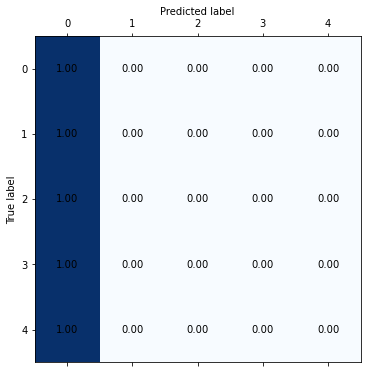

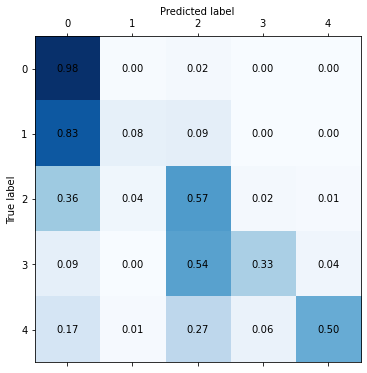

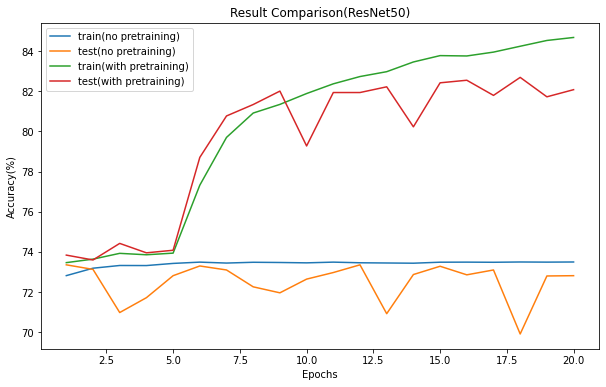

In [20]:
"""no pretrained weights"""
model_no_pretrained = ResNet50(num_class=num_class, pretrained=False)
optimizer = optim.SGD(model_no_pretrained.parameters(), lr=lr, momentum=momentum, weight_decay=weight_decay)
df_no_pretrained = train(model_no_pretrained, loader_train, loader_test, Loss, optimizer, epochs, device,
                         num_class, 'resnet50_no_pretraining')

# test and save confusion matrix figure
confusion_matrix, _ = evaluate(model_no_pretrained, loader_test, device, num_class)
figure = plot_confusion_matrix(confusion_matrix)
figure.savefig('ResNet50(no pretrained weights).png')


"""with pretrained weights (feature extraction for few epochs, then finefuning for some epochs)"""
model_with_pretrained = ResNet50(num_class=num_class, pretrained=True)

# feature extraction
params_to_update=[]
for name, param in model_with_pretrained.named_parameters():
    if param.requires_grad:
        params_to_update.append(param)
optimizer = optim.SGD(params_to_update, lr=lr, momentum=momentum, weight_decay=weight_decay)
df_firststep = train(model_with_pretrained, loader_train, loader_test, Loss, optimizer, epochs_feature_extraction,
                     device, num_class, 'resnet50_with_pretraining')
# finetuning
for param in model_with_pretrained.parameters():
    param.requires_grad = True
optimizer = optim.SGD(model_with_pretrained.parameters(), lr=lr, momentum=momentum, weight_decay=weight_decay)
df_secondstep = train(model_with_pretrained, loader_train, loader_test, Loss, optimizer, epochs_fine_tuning,
                      device, num_class, 'resnet50_with_pretraining')
df_with_pretrained = pd.concat([df_firststep, df_secondstep], axis=0, ignore_index=True)

# test and save confusion matrix figure
confusion_matrix, _ = evaluate(model_with_pretrained, loader_test, device, num_class)
figure = plot_confusion_matrix(confusion_matrix)
figure.savefig('ResNet50(with pretrained weights).png')

# plot accuracy figure
figure = plot(df_no_pretrained, df_with_pretrained, 'Result Comparison(ResNet50)')
figure.savefig('Result Comparison(ResNet50).png')

In [21]:
print('resnet50_no_pretraining')
print(df_no_pretrained)

print('resnet50_with_pretraining')
print(df_with_pretrained)

resnet50_no_pretraining
    epoch  acc_train   acc_test
0       1  72.813979  73.352313
1       2  73.184099  73.124555
2       3  73.319335  70.975089
3       4  73.315776  71.715302
4       5  73.422542  72.811388
5       6  73.486601  73.295374
6       7  73.440336  73.096085
7       8  73.479483  72.256228
8       9  73.468807  71.957295
9      10  73.451012  72.640569
10     11  73.486601  72.967972
11     12  73.454571  73.352313
12     13  73.443895  70.918149
13     14  73.433218  72.868327
14     15  73.483042  73.281139
15     16  73.486601  72.854093
16     17  73.479483  73.096085
17     18  73.493719  69.907473
18     19  73.486601  72.797153
19     20  73.493719  72.811388
resnet50_with_pretraining
    epoch  acc_train   acc_test
0       1  73.461689  73.836299
1       2  73.636072  73.594306
2       3  73.924339  74.419929
3       4  73.853162  73.950178
4       5  73.935015  74.078292
5       1  77.319478  78.704626
6       2  79.700345  80.768683
7       3  80.913912  